# Simple Opaque WDM Simulator with Anycast Service Requests

File that reads the binary file with the complete set of results from the simulation and plots the final results.

In [1]:
import pickle
import time

import plots
import core
import graph

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
with open('./results/data/final_results.h5', 'rb') as file:
    data = pickle.load(file)
    print(data.keys())

dict_keys(['args', 'env', 'results', 'policies', 'loads', 'timedelta', 'datetime'])


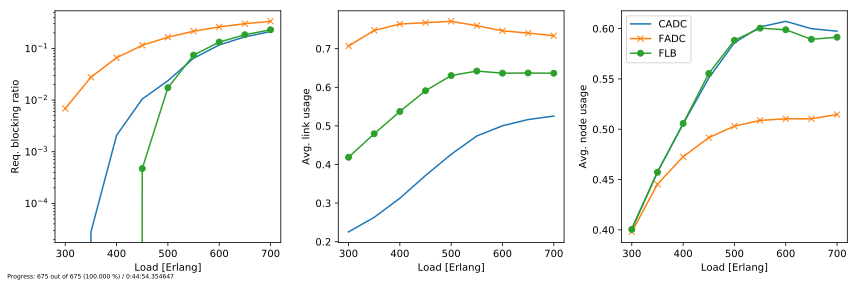

In [3]:
data['env'].plot_formats = ['svg']
plots.plot_final_results(data['env'], data['results'], None, timedelta=data['timedelta'], show=True)

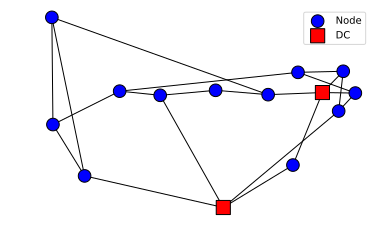

In [4]:
# reading the topology
topology = graph.get_topology(data['args'])
topology = graph.get_dcs(data['args'], topology)
topology = graph.get_ksp(data['args'], topology)

plt.figure()
plt.axis('off')
pos = nx.get_node_attributes(topology, 'pos')

nx.draw_networkx_edges(topology, pos)

# using scatter rather than nx.draw_networkx_nodes to be able to have a legend in the topology
nodes_x = [pos[x][0] for x in topology.graph['source_nodes']]
nodes_y = [pos[x][1] for x in topology.graph['source_nodes']]
plt.scatter(nodes_x, nodes_y, label='Node', color='blue', alpha=1., marker='o', linewidths=1., edgecolors='black', s=160.)

nodes_x = [pos[x][0] for x in topology.graph['dcs']]
nodes_y = [pos[x][1] for x in topology.graph['dcs']]
plt.scatter(nodes_x, nodes_y, label='DC', color='red', alpha=1., marker='s', linewidths=1., edgecolors='black', s=200.)

plt.legend(loc=1)

plt.savefig(f'./results/{data["env"].output_folder}/topology_{data["env"].topology_name}.svg')
plt.show()
plt.close() # avoids too many figures opened at once